In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [6]:
titatic_data = pd.read_csv('..\\Week_02_ML\\Titanic-Dataset.csv')
df_titanic = titatic_data
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
print(df_titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [14]:
from sklearn.preprocessing import PolynomialFeatures

# Handle missing values in Age column by filling with median
df_titanic_clean = df_titanic.copy()
df_titanic_clean['Age'].fillna(df_titanic_clean['Age'].median(), inplace=True)

poly_cols=["Age","SibSp"]
poly = PolynomialFeatures(degree=2, include_bias=False)

poly_features = poly.fit_transform(df_titanic_clean[poly_cols])
poly_feature_names = poly.get_feature_names_out(poly_cols)

print("Polynomial feature names:")
print(poly_feature_names)
print(f"\nOriginal shape: {df_titanic_clean[poly_cols].shape}")
print(f"Polynomial features shape: {poly_features.shape}")
print(f"\nFirst 5 rows of polynomial features:")
print(poly_features[:5])

Polynomial feature names:
['Age' 'SibSp' 'Age^2' 'Age SibSp' 'SibSp^2']

Original shape: (891, 2)
Polynomial features shape: (891, 5)

First 5 rows of polynomial features:
[[2.200e+01 1.000e+00 4.840e+02 2.200e+01 1.000e+00]
 [3.800e+01 1.000e+00 1.444e+03 3.800e+01 1.000e+00]
 [2.600e+01 0.000e+00 6.760e+02 0.000e+00 0.000e+00]
 [3.500e+01 1.000e+00 1.225e+03 3.500e+01 1.000e+00]
 [3.500e+01 0.000e+00 1.225e+03 0.000e+00 0.000e+00]]


In [15]:
## binning age into  Catagorical vaules
bins = [0, 12, 20, 40, 60, 80]
labels = ['Child', 'Teenager', 'Adult', 'Middle-Aged', 'Senior']
df_titanic_clean['AgeGroup'] = pd.cut(df_titanic_clean['Age'], bins=bins, labels=labels)
df_titanic_clean[['Age', 'AgeGroup']].head(10)

,Age,AgeGroup
0,22.0,Adult
1,38.0,Adult
2,26.0,Adult
3,35.0,Adult
4,35.0,Adult
5,28.0,Adult
6,54.0,Middle-Aged
7,2.0,Child
8,27.0,Adult
9,14.0,Teenager


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
#crate a sample dataset
hours = np.array([2,4,6,8,10]).reshape(-1,1)
marks = np.array([55,60,70,80,88])

In [ ]:
#train a linear regression model
model = LinearRegression()
model.fit(hours, marks)
#predict marks for a student who studies 7 hours
print("m: ",model.coef_[0])
print("c: ",model.intercept_)
#marks = m*hours + c
#marks = 4.3Xhours + 44.8



m:  4.3
c:  44.8


Visualize the Best fit Line


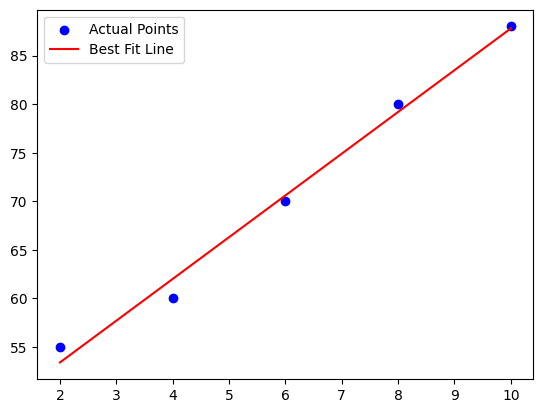

In [6]:
#Visualize the Best fit Line

plt.scatter(hours, marks, color='blue', label='Actual Points')
predicted_marks = model.predict(hours)
plt.plot(hours, predicted_marks, color='red', label='Best Fit Line')
plt.legend()
plt.show()

In [7]:
#predict marks for 7 hours of study
predicted_mark_7hrs = model.predict(np.array([[7]]))
print(f"Predicted marks for 7 hours of study: {predicted_mark_7hrs[0]:.2f}")

Predicted marks for 7 hours of study: 74.90
